# Voting 
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

## 데이터 준비

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

딕셔너리처럼 키를 갖는 자료형

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris.target_names
#iris['target_names']로 해도 결과 같음

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [10]:
df = pd.DataFrame(data=iris['data'], columns = iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
# 결측치, 중복치 확인


## 학습셋 분리

In [14]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X, y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns] 0      0
1      0
2      0
3      0
4   

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 2022)
# stratify = 데이터가 기울어진 경우(정상/비정상 등)
# 많은 데이터를 줄이는 건 down sampling
# 랜덤인 경우에는 정상/비정상이 train과 test에 몰릴 수도 있음 -> stratify 로 잘 섞이도록 분리해줌


In [17]:
# 정규화
# 트리가 아닌 경우에는 정규화 필수 - 트리 베이스인 경우에는 안해도 ㄱㅊ
# 정규화할 때는 train 데이터만 가지고

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
X_train = scaler.fit_transform(X_train) #numpy array상태라서 head()안됨
X_train[:5]

array([[ 0.74198233, -0.32371562,  0.33532535,  0.13579779],
       [ 0.24176952, -1.91389762,  0.73771577,  0.39652954],
       [-0.00833688, -0.77805333,  0.10538797,  0.00543191],
       [ 1.11714194, -0.09654676,  0.85268446,  1.43945654],
       [-0.50854969,  1.94797295, -1.15926764, -1.03749509]])

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier #voting 담당

nclf = KNeighborsClassifier()
sclf = SVC()
tclf = DecisionTreeClassifier()
vclf = VotingClassifier(estimators=[('knn', nclf), ('svc', sclf), ('tree', tclf)],
                       voting = 'hard',
                       weights = [1,1,1])



In [21]:
vclf.fit(X_train, y_train)
vclf.score(X_train, y_train)

0.9916666666666667

## 테스트 스코어

In [22]:
X_test = scaler.transform(X_test)

In [23]:
vclf.score(X_test, y_test)

0.9333333333333333

In [24]:
y_test = y_test.values

In [25]:
vclf.score(X_test, y_test)

0.9333333333333333

In [26]:
y_pred = vclf.predict(X_test)
y_pred[:5]

array([2, 0, 2, 1, 0])

In [28]:
my.print_score(y_test, y_pred, average='macro')

accuracy: 0.9333333333333333
precision: 0.9444444444444445
recall: 0.9333333333333332


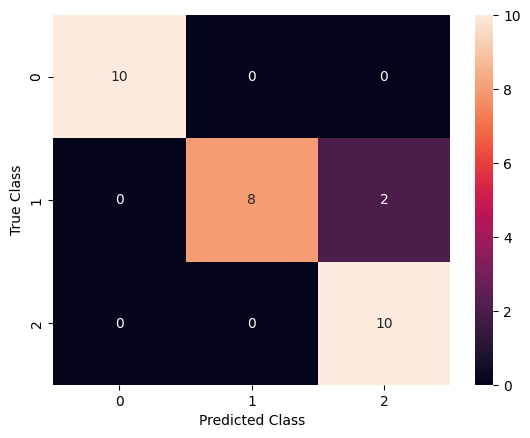

In [29]:
my.draw_cm(y_test, y_pred)